## Introduction to Lending Club Data

Context on the data in this assignment is provided in the lecture notes from Unit 1. Please review those notes before completing the assignment.

The data used in this exercise represents information from LendingClub (link: https://www.lendingclub.com/), provided by a company that provides analytics to investors in ABS, a company called dv01 (link: https://dv01.co/). 

IMPORTANT NOTE ON DATA PERMISSIONING: The data used in this exercise is meant for use in this class only, and it should not be persisted after the class ends or shared with anyone not enrolled.  

In [5]:
# Import common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import seaborn as sns

In [6]:
# Specify fields from .csv file to be analyzed 
# See LendingClub data dictionary for more information on each field

fields = ['Original Loan Balance', 'Interest Rate', 'Term', 'Monthly Payment', 'Annual Income', 
          'Pre-Loan DTI', 'Original FICO', 'Number of Trade Lines Opened (Last 12 Months)', 
          'Employment Length', 'Housing Status', 'Loan Status']

# Read in data 
# Change the path as needed
file = "/Users/liloli/Desktop/GR5293/hw1/club-2017-p2-update-2019-03-31.csv"

# raw_data object includes all rows, including missing values (NAs)
raw_data = pd.read_csv(file, usecols = fields)

# data object has no missing values (NAs); these were originally present in raw_data object
data = raw_data.copy()
data = raw_data.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)

# Keep only 3-year (36-month) loans for data analysis 
# data_36 object only has loans that have a term of 36 months (3 years) and no missing values (NAs) 

# Use this dataset as your starting point for the questions below. 
data_36 = data[data['Term'] == 36] 

In [7]:
data_36 #自己加的，看下数据长啥样

,Original Loan Balance,Loan Status,Term,Interest Rate,Monthly Payment,Annual Income,Pre-Loan DTI,Original FICO,Employment Length,Housing Status,Number of Trade Lines Opened (Last 12 Months)
0,11200.0,Paid Off,36,0.1199,371.95,45000.0,0.3589,672,3.0,Rent,4
2,10000.0,Paid Off,36,0.1199,332.10,57200.0,0.3569,717,10.0,Rent,1
5,10000.0,Current,36,0.1602,351.67,100000.0,0.3593,662,9.0,Own - Mortgage,1
22,16000.0,Current,36,0.1359,543.67,90000.0,0.3651,712,2.0,Own - Mortgage,1
28,14400.0,Current,36,0.1262,482.57,35576.8,0.3924,702,2.0,Rent,0
...,...,...,...,...,...,...,...,...,...,...,...
22319,14000.0,Paid Off,36,0.0824,440.27,120000.0,0.1404,667,9.0,Own - Mortgage,2
22320,14000.0,Current,36,0.1144,461.27,62000.0,0.2160,682,1.0,Rent,3
22321,4000.0,Current,36,0.1144,131.79,43000.0,0.0505,692,5.0,Rent,1
22323,8500.0,Current,36,0.1149,280.26,60000.0,0.1370,677,3.0,Rent,2


## Problem 1

Note: for parts (b), (c), and (d), be sure to respond using the table format shown in the assignment document

In [9]:
# How many loans (rows) are there?
count_row = data_36.shape[0]
count_row

10469

In [10]:
# How many variables (columns) are there? 
count_col = data_36.shape[1]
count_col

11

In [4]:
# What are the data types of each column? 
# Which are numerical and which are non-ordered strings (categorical)? 

# Hint: Use the info() function! 

In [14]:
# What are the data types of each column? 
data_36.dtypes

Original Loan Balance                            float64
Loan Status                                       object
Term                                               int64
Interest Rate                                    float64
Monthly Payment                                  float64
Annual Income                                    float64
Pre-Loan DTI                                     float64
Original FICO                                      int64
Employment Length                                float64
Housing Status                                    object
Number of Trade Lines Opened (Last 12 Months)      int64
dtype: object

In [5]:
# What are the units of each numerical column?
# For example, numerical values could be in dollar amounts, counts, units of time, counts per unit time. 

# Hint: This is less of a coding question and more of a context question. Look at course notes and the data dictionary. 
# You may also get insights from using the describe() function shown below. 

In [6]:
data_36.describe()

,Original Loan Balance,Term,Interest Rate,Monthly Payment,Annual Income,Pre-Loan DTI,Original FICO,Employment Length,Number of Trade Lines Opened (Last 12 Months)
count,10469.000000,10469.0,10469.000000,10469.000000,1.046900e+04,10469.000000,10469.000000,10469.000000,10469.000000
mean,13111.314357,36.0,0.135828,443.871433,7.432351e+04,0.202874,697.410736,5.246728,2.183494
std,9608.036105,0.0,0.042958,322.488261,6.152105e+04,0.096940,31.596006,3.859538,1.902588
min,1000.000000,36.0,0.053200,30.910000,0.000000e+00,0.000000,662.000000,0.000000,0.000000
25%,6000.000000,36.0,0.104200,203.880000,4.300000e+04,0.129200,672.000000,2.000000,1.000000
50%,10000.000000,36.0,0.135900,339.790000,6.000000e+04,0.195500,692.000000,5.000000,2.000000
75%,17500.000000,36.0,0.160200,593.460000,8.800000e+04,0.272600,712.000000,10.000000,3.000000
max,40000.000000,36.0,0.263000,1566.800000,2.162772e+06,0.399900,847.000000,10.000000,18.000000


In [7]:
# Inspect the distribution of the following variables using histograms: Annual Income, Pre-Loan DTI, and Original FICO. 
# Which seem to have upper and/or lower bounds?  
# Which are effectively continuous? 
# How many unique values are there? 
# Support your answer with histograms and tables where appropriate. 

38

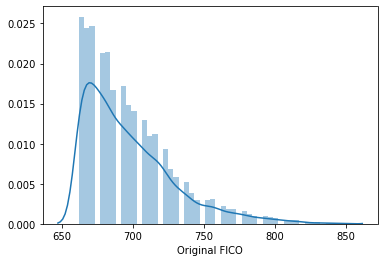

In [16]:
# Sample code for 'Annual Income has been provided for you'
# Include this as part of your final answer!

sns.distplot(data_36['Original FICO'])
len(data_36['Original FICO'].unique())

## Problem 2

In [9]:
# Each row represents a loan, and includes attributes of borrowers when they apply, decisions made by the lender or platform, and then what happens over the life of the loan. 
# Describe the chronological order of how these fields are recorded in this dataset. That is, 

# Which fields are recorded when a borrower applies for a loan with LendingClub? 
# Which fields are gathered when LendingClub inquires about a borrower when they contact credit bureaus and FICO? 
# Which fields are set when LendingClub sets the terms of the loan?
# Which fields are determined some time after the borrower begins to pay back the loan (or not)? 

# Hint: Also not a coding question. Look at course notes and the data dictionary. 

In [10]:
# Each of the attributes reflects the state of the borrower at the time of an application, but borrowers are dynamic!  
# At least two of these fields change when a new loan is taken out. 
# Please say which ones and describe, in mathematical terms, how they change.

# Hint: Also not a coding question. Look at course notes and the data dictionary. 

In [11]:
# Many ML courses that use credit data show loan outcomes exclusively falling into two classes: default or no default, and a simplification also used in many industry applications. 
# In reality, loans involve payments by borrowers over time and so the outcome of a single loan does not fall neatly into two categories. 
# However, for the purposes of analyzing trends, we will show one common way of mapping sequences of payments into two aforementioned classes. 

In [12]:
# What outcomes are shown in the original dataset?

# Hint: Apply the unique() function onto the column 'Loan Status' in the data_36 dataframe.

In [19]:
data_36['Loan Status'].unique()

array(['Paid Off', 'Current', 'Sold - Debt Sale', 'Charged Off',
       '60 - 89 Days Delinquent', '30 - 59 Days Delinquent',
       '>= 90 Days Delinquent', 'Late (16 - 29 DPD)'], dtype=object)

In [20]:
# Mapping Loan Status to new variable Loan Status (0 or 1)

data_36_default = data_36.copy()
data_36_default['Default'] = data_36['Loan Status'].isin(['Charged Off', 'Default']).astype('Int64')
data_36_default = data_36_default.drop('Loan Status', axis = 1)

In [14]:
# Using the mapping shown in the notebook, what is the overall default prevalence?

# Hint: Apply the mean() function onto the 'Default' column of the data_36_default dataframe. 

In [23]:
data_36_default['Default'].mean()

0.03648868086732257

In [25]:
data_36_default['Default'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [15]:
# Use seaborn to create a joinplot (contour plot with histograms) of original FICO scores (x_1), pre-loan DTI (x_2), and prevalence (i.e. percentage) of default ($y$). 
# Include this plot in your solutions write-up. 
# Which variable--original FICO or pre-loan DTI--appears to be a better predictor of probability of default?  
# Why? 
# Which distribution is more symmetric? 

# Hint: Use the following template to help plot your answer: sns.jointplot(x_1, x_2, data = ?? , kind = 'kde'). 
# Be careful about which data frame you are using! Use the data_36_default dataframe. 

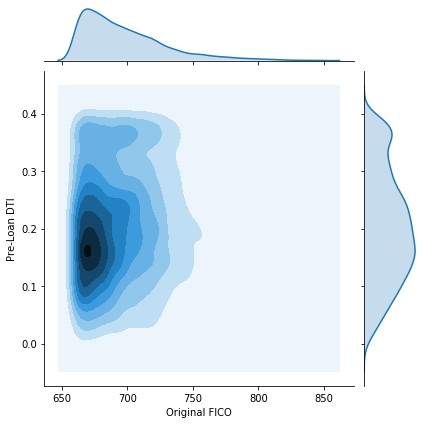

In [27]:
sns.jointplot('Original FICO', 'Pre-Loan DTI', data =  data_36_default, kind = 'kde')

In [16]:
# These functions are used to generate the plots below. 
# Look at these functions carefully and see below for a brief description. 

def bins_from_data_range(min, max, num_bins = 5):
    stepsize = (max - min) / num_bins
    thresholds = [min + stepsize*i for i in range(num_bins + 1)]
    return(thresholds)

def bins_prevalence_vs_fields(data, field, thresholds):
    default_prev = []
    pop_density = []
    bin_labels = []
    #create a format string so it'll look nice for smaller and larger numbers...
    if thresholds[0] < 1:
        f_string = '{:.0%}-{:.0%}'
    else:
        f_string = '{:.0f}-{:.0f}'
    total_pop = data[field].count()
    #compute values
    for i in range(len(thresholds)-1):
        default_prev.append( data[data[field].between(thresholds[i], thresholds[i+1])]['Default'].mean() )
        pop_density.append(data[data[field].between(thresholds[i], thresholds[i+1])]['Default'].count() / total_pop )
        bin_labels.append(f_string.format(thresholds[i], thresholds[i+1]))
    return( default_prev, pop_density, bin_labels)

def plot_prev_pop_bins(data, field,default_prev, pop_density, bin_labels ):
#set up axes
    fig = plt.figure(figsize=(6, 8))
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((4, 1), (2, 0), rowspan = 2)
    #ax1.yaxis.set_major_formatter(tic.PercentFormatter(1.0))
    #ax2.yaxis.set_major_formatter(tic.PercentFormatter(1.0))
# plot default prevalence
    ax1.set_title('Default Prevalence vs. '+field, fontsize=16)
    ax1.bar(range(len(bin_labels)), default_prev)
    ax1.set_ylabel('Default Prevalence')
    ax1.set_xticks(np.arange(len(bin_labels)))
    ax1.set_xticklabels( bin_labels, rotation=90)
    ax1.set_xlabel(field)
    ax1.yaxis.set_major_formatter(tic.PercentFormatter(1.0))
    ax1.grid(linestyle=':', linewidth='0.5', color='grey')
#plot population density
    ax2.set_title('Population Density', fontsize=16)
    ax2.bar(range(len(bin_labels)), pop_density, color = 'purple')
    ax2.set_ylabel('Percent of Population')
    ax2.set_xticks(np.arange(len(bin_labels)))
    ax2.set_xticklabels( bin_labels, rotation=90)
    ax2.set_xlabel(field)
    ax2.yaxis.set_major_formatter(tic.PercentFormatter(1.0))
    ax2.grid(linestyle=':', linewidth='0.5', color='grey')
#render plots
    fig.tight_layout()
    plt.show()

In [17]:
# Using the given bar_plot_prevalence_vs_field() function in the notebook, it is possible to separate the population according to a specified field into bins. 
# The prevalence of default are then calculated for each bin and then displayed in a barplot and table. 
# Similarly, the given plot_prev_pop_bins() function creates a bar plot that displays the proportion of the population that belongs into each bin. 
# Numerical values for each bin of both bar plots are displayed in a pandas table as well. 
# The bins_from_data_range() function allows one to specify the range of a field to separate and the number of bins to separate into. 
# Run the code provided in the notebook to answer the following. 

# i.e. The plots have already been done for you! The following questions below ask you to intepret them. 

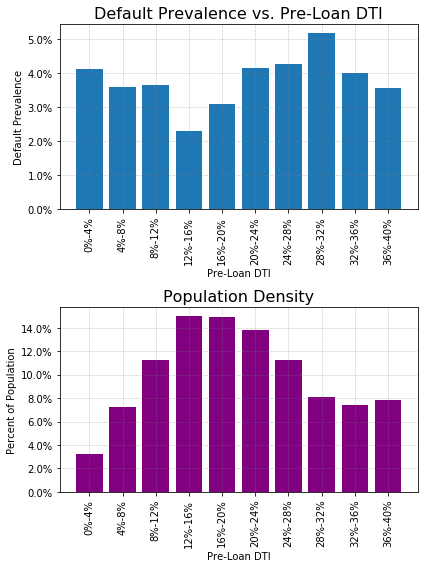

,Bins,Pop Density,Default Prev
0,0%-4%,3.26%,4.11%
1,4%-8%,7.20%,3.58%
2,8%-12%,11.28%,3.64%
3,12%-16%,15.02%,2.29%
4,16%-20%,14.89%,3.08%
5,20%-24%,13.78%,4.16%
6,24%-28%,11.23%,4.25%
7,28%-32%,8.13%,5.17%
8,32%-36%,7.40%,4.00%
9,36%-40%,7.80%,3.55%


In [18]:
bins = bins_from_data_range( data_36['Pre-Loan DTI'].min(), data_36['Pre-Loan DTI'].max(), 10)

default_prev, population_density, bin_labels = bins_prevalence_vs_fields(data_36_default, 'Pre-Loan DTI', bins )
plot_prev_pop_bins(data_36_default, 'Pre-Loan DTI',  default_prev, population_density, bin_labels )

out_pandas = pd.DataFrame.from_dict({'Bins':bin_labels, 'Pop Density':population_density, 'Default Prev':default_prev})
out_pandas.style.format({'Pop Density':'{:.2%}', 'Default Prev': '{:.2%}'})

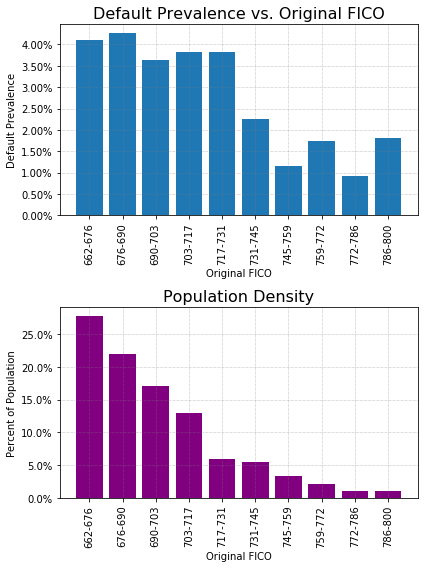

,Bins,Pop Density,Default Prev
0,662-676,27.73%,4.10%
1,676-690,21.99%,4.26%
2,690-703,17.09%,3.63%
3,703-717,12.99%,3.82%
4,717-731,5.98%,3.83%
5,731-745,5.52%,2.25%
6,745-759,3.32%,1.15%
7,759-772,2.20%,1.74%
8,772-786,1.05%,0.91%
9,786-800,1.05%,1.82%


In [19]:
bins = bins_from_data_range( data_36['Original FICO'].min(), data_36['Original FICO'].max(), 10)
bins = bins_from_data_range( data_36['Original FICO'].min(), 800, 10)

default_prev, population_density, bin_labels = bins_prevalence_vs_fields(data_36_default, 'Original FICO', bins)
plot_prev_pop_bins(data_36_default, 'Original FICO',  default_prev, population_density, bin_labels)

out_pandas = pd.DataFrame.from_dict({'Bins':bin_labels, 'Pop Density':population_density, 'Default Prev':default_prev})
out_pandas.style.format({'Pop Density':'{:.2%}', 'Default Prev': '{:.2%}'})


## Problem 3

## Problem 3

In [21]:
# Is the population more evenly distributed between the bins for Pre-Loan DTI or Original FICO? 
# Do higher proportions of population in each bin make you more confident or less confident about the associated prevalence of default? 
# Why?
